<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/EjercicioSeriesFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

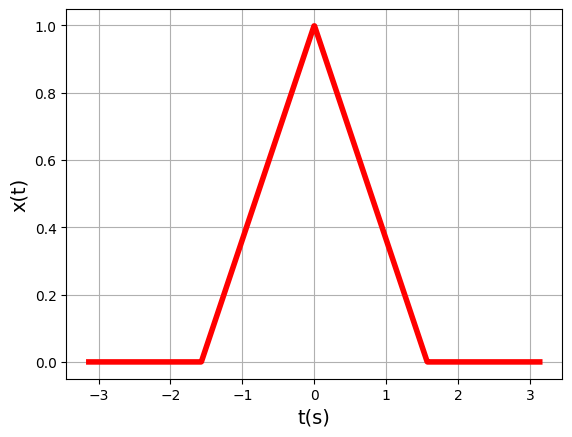

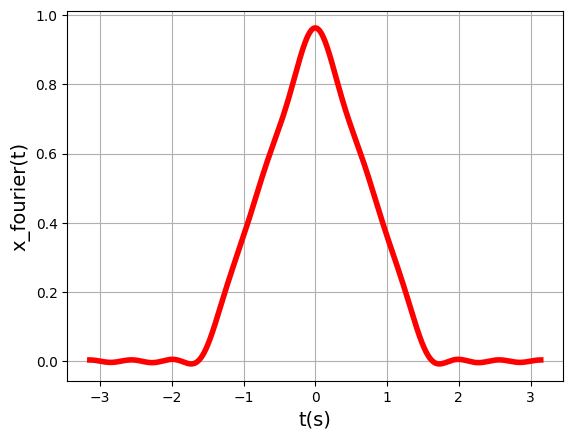

In [ ]:
#hallar serie de fourier para la funcion dada
#x(t)= 0 para d<t<T/2
#x(t)= 0 para -T/2<t<d

# Para graficar
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import warnings
warnings.filterwarnings("ignore")

#Parámetros señal
T= 2*np.pi #periodo[seg]
t= sp.symbols('t', real=True)
d1= T/4
B=1 #intercepto con eje y
m= B/ d1 #pendiente

xt = sp.Piecewise(
    (0,(t>=-T/2) & (t<-d1)),
    (m*t + B,(t>=-d1) & (t<=0)),
    (-m*t + B,(t>0) & (t<=d1)),
    (0,(t>d1) & (t<=T/2))
)

# Crear función evaluable numéricamente para xt
xt_func = sp.lambdify(t, xt, modules=['numpy'])
# lambdify convierte expresiones simbólicas en funciones numéricas
#modules=['numpy']: le dice a lambdify que use las funciones de numpy para evaluar la expresión
tv = np.linspace(-T/2, T/2, 1000)
xo = xt_func(tv)

#Mostrar señal original
plt.plot(tv, xo, 'r', linewidth=4)
plt.grid()
plt.xlabel("t(s)", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()

#Serie de fourier
n= sp.symbols('n', integer=True)
C_n = (1/T) * sp.integrate(xt * sp.exp(-sp.I * 2 * np.pi * n * t / T), (t, -T/2, T/2))

#Reconstruir la señal
N=10 #numero de términos
xt_fourier = 0
for k in range(-N, N+1):
    Ck = C_n.subs(n, k)  # Sustituye n con el valor actual k
    xt_fourier += Ck * sp.exp(sp.I * 2 * np.pi * k * t / T)

#Crear función evaluable numéricamente para xt_fourier
xf_func = sp.lambdify(t, xt_fourier, modules=['numpy'])
xf= xf_func(tv)

#Mostrar señal reconstruida
plt.plot(tv,xf, 'r', linewidth=4)
plt.grid()
plt.xlabel("t(s)", fontsize=14)
plt.ylabel("x_fourier(t)", fontsize=14)
plt.show()

